In [2]:
import pandas as pd
import numpy as np
import sys
sys.path.append('../../src')
from ecomplexity import ecomplexity
import matplotlib.pyplot as plt

import matplotlib.ticker as ptick
import networkx as nx
import networkx.algorithms.bipartite as bip
plt.rcParams['font.family'] = 'Meiryo'
plt.rcParams['font.size'] = 15

# 小数点以下 桁数 6
pd.options.display.float_format = '{:.3f}'.format


In [3]:
import initial_condition
from analysis import weight
from analysis import rank as vr


In [4]:
global data_dir, output_dir
data_dir = '../../data/processed/internal/firms/'
output_dir = '../../output/'


In [10]:
# 初期条件
ar = initial_condition.AR
year_style = initial_condition.YEAR_STYLE

year_start = initial_condition.YEAR_START
year_end = initial_condition.YEAR_END
year_range = initial_condition.YEAR_RANGE

classification = initial_condition.CLASSIFICATION
class_weight = initial_condition.CLASS_WEIGHT
applicant_weight = initial_condition.APPLICANT_WEIGHT

extract_population = initial_condition.EXTRACT_POPULATION
top_p_or_num = initial_condition.TOP_P_OR_NUM
# top_p_or_num = ('num', 300)
color_list = initial_condition.COLOR_LIST



In [11]:
top_p_or_num

('num', 100)

In [12]:
df = pd.read_csv(f'{data_dir}{ar}_{year_style}_{top_p_or_num[0]}_{top_p_or_num[1]}.csv')
df

app_year_period right_person_name   reg_num  schmoch35  diversity    kci  \
0         1981-1990     アルプスアルパイン株式会社  1026.167         25          5 -0.765   
1         1981-1990          オムロン株式会社  2424.400         28          9 -1.091   
2         1981-1990         オリンパス株式会社  4540.667         29          6 -0.105   
3         1981-1990        カシオ計算機株式会社  2337.500         27          8 -1.304   
4         1981-1990          キヤノン株式会社 20269.500         32          7 -1.000   
..              ...               ...       ...        ...        ...    ...   
394       2001-2010          ＨＯＹＡ株式会社  3331.833         28          6  0.681   
395       2001-2010       ＪＦＥスチール株式会社  6608.283         30          8  0.794   
396       2001-2010  ＮＥＣプラツトフオームズ株式会社  2642.200         25          7 -1.924   
397       2001-2010           ＴＤＫ株式会社  5004.817         33          8 -0.353   
398       2001-2010           ＵＢＥ株式会社  1292.333         30         11  0.951   

      kh_1   kh_2   kh_3  kh_4  ...  kh_11  kh_12  kh_13  kh_14  kh_15  kh_16  \
0   24.800  8.374 23.951 8.811  ... 24.798  9.195 24.864  9.220 24.906  9.236   
1   21.778  8.538 23.199 8.655  ... 24.727  9.166 24.822  9.203 24.880  9.226   
2   27.667  8.728 25.352 9.124  ... 24.930  9.246 24.944  9.251 24.954  9.255   
3   20.500  8.205 22.563 8.502  ... 24.684  9.150 24.797  9.193 24.865  9.220   
4   22.857  8.028 23.764 8.656  ... 24.757  9.179 24.838  9.210 24.889  9.230   
..     ...    ...    ...   ...  ...    ...    ...    ...    ...    ...    ...   
394 23.000  9.967 25.966 9.808  ... 26.005  9.496 25.996  9.485 25.992  9.478   
395 26.000  9.963 26.431 9.671  ... 26.001  9.487 25.994  9.480 25.991  9.476   
396 24.286  8.379 25.479 8.874  ... 25.948  9.421 25.966  9.445 25.975  9.457   
397 29.750  9.304 26.832 9.383  ... 25.982  9.461 25.983  9.466 25.985  9.469   
398 28.091 10.505 26.577 9.974  ... 26.012  9.505 26.000  9.489 25.994  9.481   

     kh_17  kh_18  kh_19  kh_20  
0   24.931  9.246 24.947  9.252  
1   24.916  9.240 24.938  9.248  
2   24.961  9.257 24.965  9.259  
3   24.907  9.236 24.932  9.246  
4   24.921  9.242 24.941  9.250  
..     ...    ...    ...    ...  
394 25.989  9.475 25.988  9.474  
395 25.989  9.474 25.988  9.473  
396 25.981  9.464 25.983  9.468  
397 25.986  9.470 25.986  9.471  
398 25.990  9.477 25.989  9.474  

[399 rows x 26 columns]

1981-2010 0.157


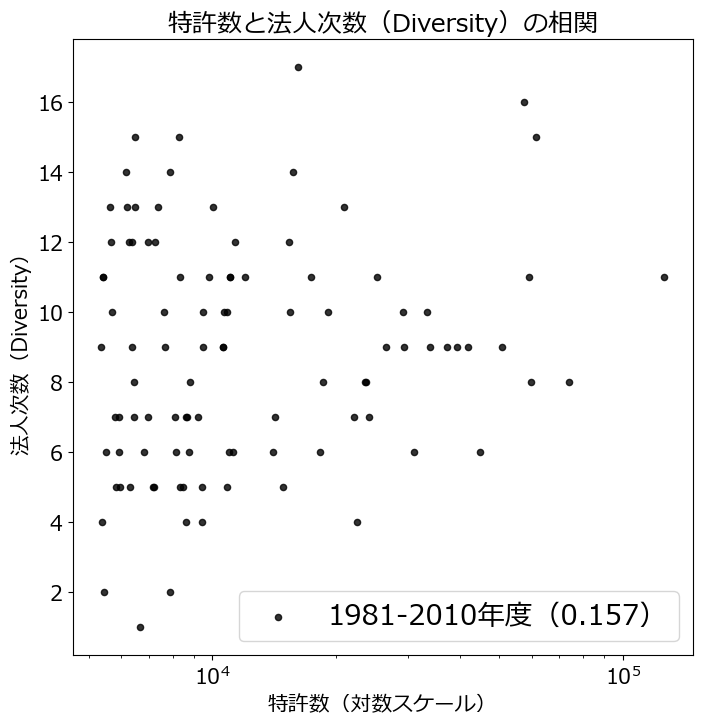

1981-2010 -0.281


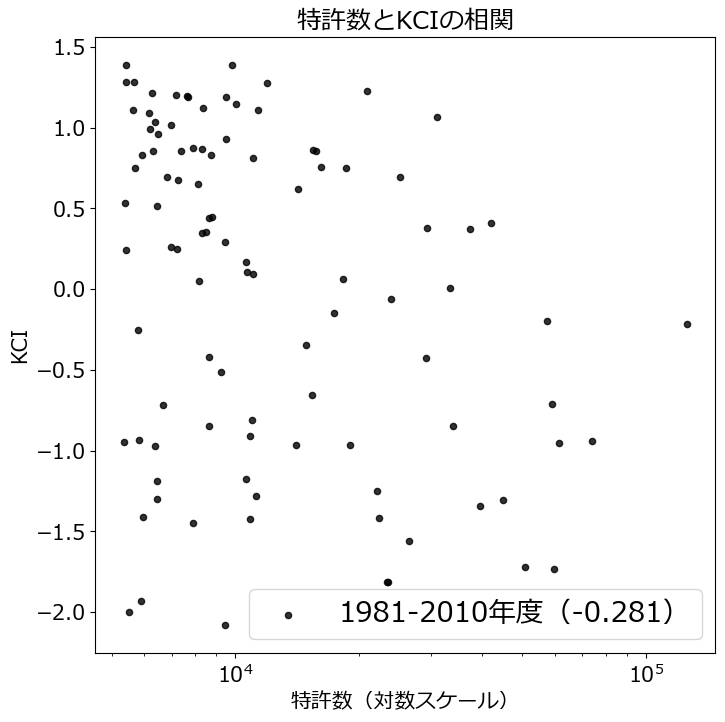

1981-2010 0.397


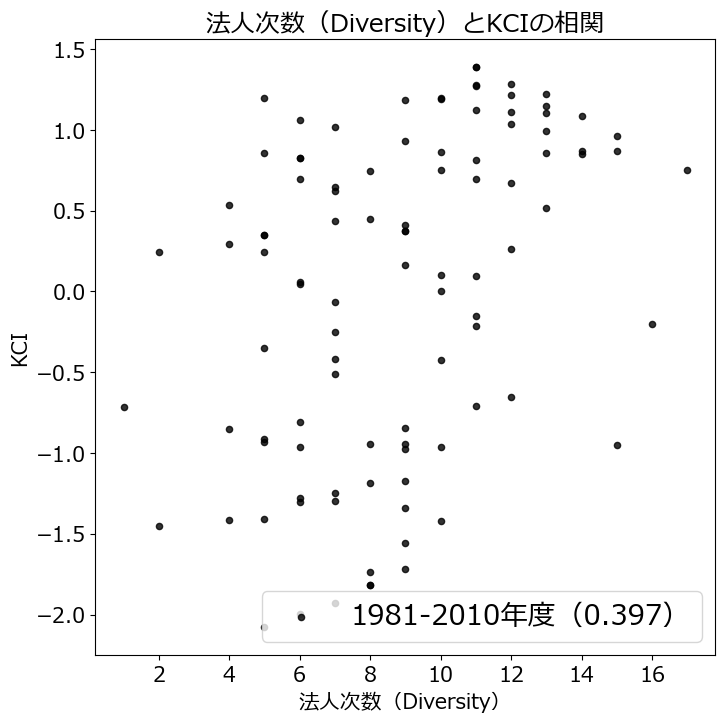

1981-2010 0.28


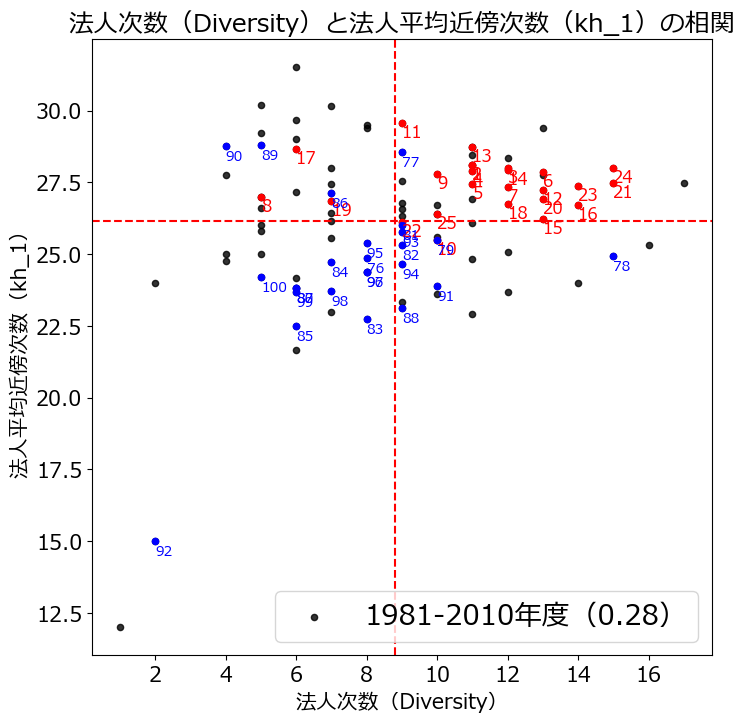

In [14]:
df_dict = {}
combi_dict = {# ind: [x, y, title, xlabel, ylabel, legend_loc]
              1: ['reg_num', 'diversity', '特許数と法人次数（Diversity）の相関', '特許数（対数スケール）', '法人次数（Diversity）', 'lower right'], 
              2: ['reg_num', 'kci', '特許数とKCIの相関', '特許数（対数スケール）', 'KCI', 'lower right'], 
              3: ['diversity', 'kci', '法人次数（Diversity）とKCIの相関', '法人次数（Diversity）', 'KCI', 'lower right'], 
              4: ['diversity', 'kh_1', '法人次数（Diversity）と法人平均近傍次数（kh_1）の相関', '法人次数（Diversity）', '法人平均近傍次数（kh_1）', 'lower right']
              }

for i, combi in combi_dict.items():
    fig, ax = plt.subplots(figsize=(8, 8))
    period = f'{year_start}-{year_end}'
    corr_num = round(df[df[f'{ar}_{year_style}_period']==period][combi[0]].corr(df[df[f'{ar}_{year_style}_period']==period][combi[1]]), 3)
    print(period, corr_num)
    ax.scatter(df[df[f'{ar}_{year_style}_period']==period][combi[0]], 
                df[df[f'{ar}_{year_style}_period']==period][combi[1]], s=20, 
                alpha=0.8, label=f'{period}年度（{corr_num}）', color='black')
    if i == 4:
        ax.axvline(x=df[df[f'{ar}_{year_style}_period']==period][combi[0]].mean(), color='red', linestyle='--')
        ax.axhline(y=df[df[f'{ar}_{year_style}_period']==period][combi[1]].mean(), color='red', linestyle='--')
    ax.set_title(combi[2])
    if combi[0] in ['reg_num']: ax.set_xscale('log')
    if combi[1] in ['reg_num']: ax.set_yscale('log')
    x_min = df[(df[f'{ar}_{year_style}_period']==period)][combi[0]].min()
    x_2smallest = df[(df[f'{ar}_{year_style}_period']==period)][combi[0]].nsmallest(2).iloc[1]
    y_2smallest = df[(df[f'{ar}_{year_style}_period']==period)][combi[1]].nsmallest(2).iloc[1]
    if i == 4: 
        # ax.text(x_min-1,
        #         df[(df[f'{ar}_{year_style}_period']==period)&(df[combi[0]]==x_min)][combi[1]].values[0]-0.5, 
        #         df[(df[f'{ar}_{year_style}_period']==period)&(df[combi[0]]==x_min)]['right_person_name'].values[0], 
        #         fontsize=15, color='red')
        # ax.text(x_min-1,
        #         df[(df[f'{ar}_{year_style}_period']==period)&(df[combi[0]]==x_2smallest)][combi[1]].values[0]-0.5, 
        #         df[(df[f'{ar}_{year_style}_period']==period)&(df[combi[0]]==x_2smallest)]['right_person_name'].values[0], 
        #         fontsize=15, color='red')
        # ax.text(df[(df[f'{ar}_{year_style}_period']==period)&(df[combi[1]]==y_2smallest)][combi[0]].values[0]-1,
        #         y_2smallest-0.5, 
        #         df[(df[f'{ar}_{year_style}_period']==period)&(df[combi[1]]==y_2smallest)]['right_person_name'].values[0], 
        #         fontsize=15, color='red')
        for i, row in df[(df[f'{ar}_{year_style}_period']==period)].sort_values('kci', ascending=False).reset_index(drop=True).iterrows():
            
            # if row['right_person_name'] in df[(df[f'{ar}_{year_style}_period']==period)].sort_values('kci', ascending=False).iloc[25:51,:]['right_person_name'].values:
            #     # ax.text(row[combi[0]], row[combi[1]]-0.5, i+1, fontsize=12, color='orange')
            #     if i+1!=51: ax.scatter(row[combi[0]], row[combi[1]], s=20, color='orange')
            # if row['right_person_name'] in df[(df[f'{ar}_{year_style}_period']==period)].sort_values('kci', ascending=False).iloc[51:76,:]['right_person_name'].values:
            #     # ax.text(row[combi[0]], row[combi[1]]-0.5, i+1, fontsize=12, color='green')
            #     ax.scatter(row[combi[0]], row[combi[1]], s=20, color='green')
            if row['right_person_name'] in df[(df[f'{ar}_{year_style}_period']==period)].sort_values('kci', ascending=False).tail(25)['right_person_name'].values:
                ax.text(row[combi[0]], row[combi[1]]-0.5, i+1, fontsize=10, color='blue')
                ax.scatter(row[combi[0]], row[combi[1]], s=20, color='blue')
            if row['right_person_name'] in df[(df[f'{ar}_{year_style}_period']==period)].sort_values('kci', ascending=False).head(25)['right_person_name'].values:
                ax.text(row[combi[0]], row[combi[1]]-0.5, i+1, fontsize=12, color='red')
                ax.scatter(row[combi[0]], row[combi[1]], s=20, color='red')
        
    ax.set_ylabel(combi[4])
    ax.set_xlabel(combi[3])
    ax.legend(loc=combi[5], fontsize=20)
    plt.show()
    

In [9]:
df[df[f'{ar}_{year_style}_period']==period].sort_values('kci', ascending=False).reset_index(drop=True).head(15)

NameError: name 'period' is not defined

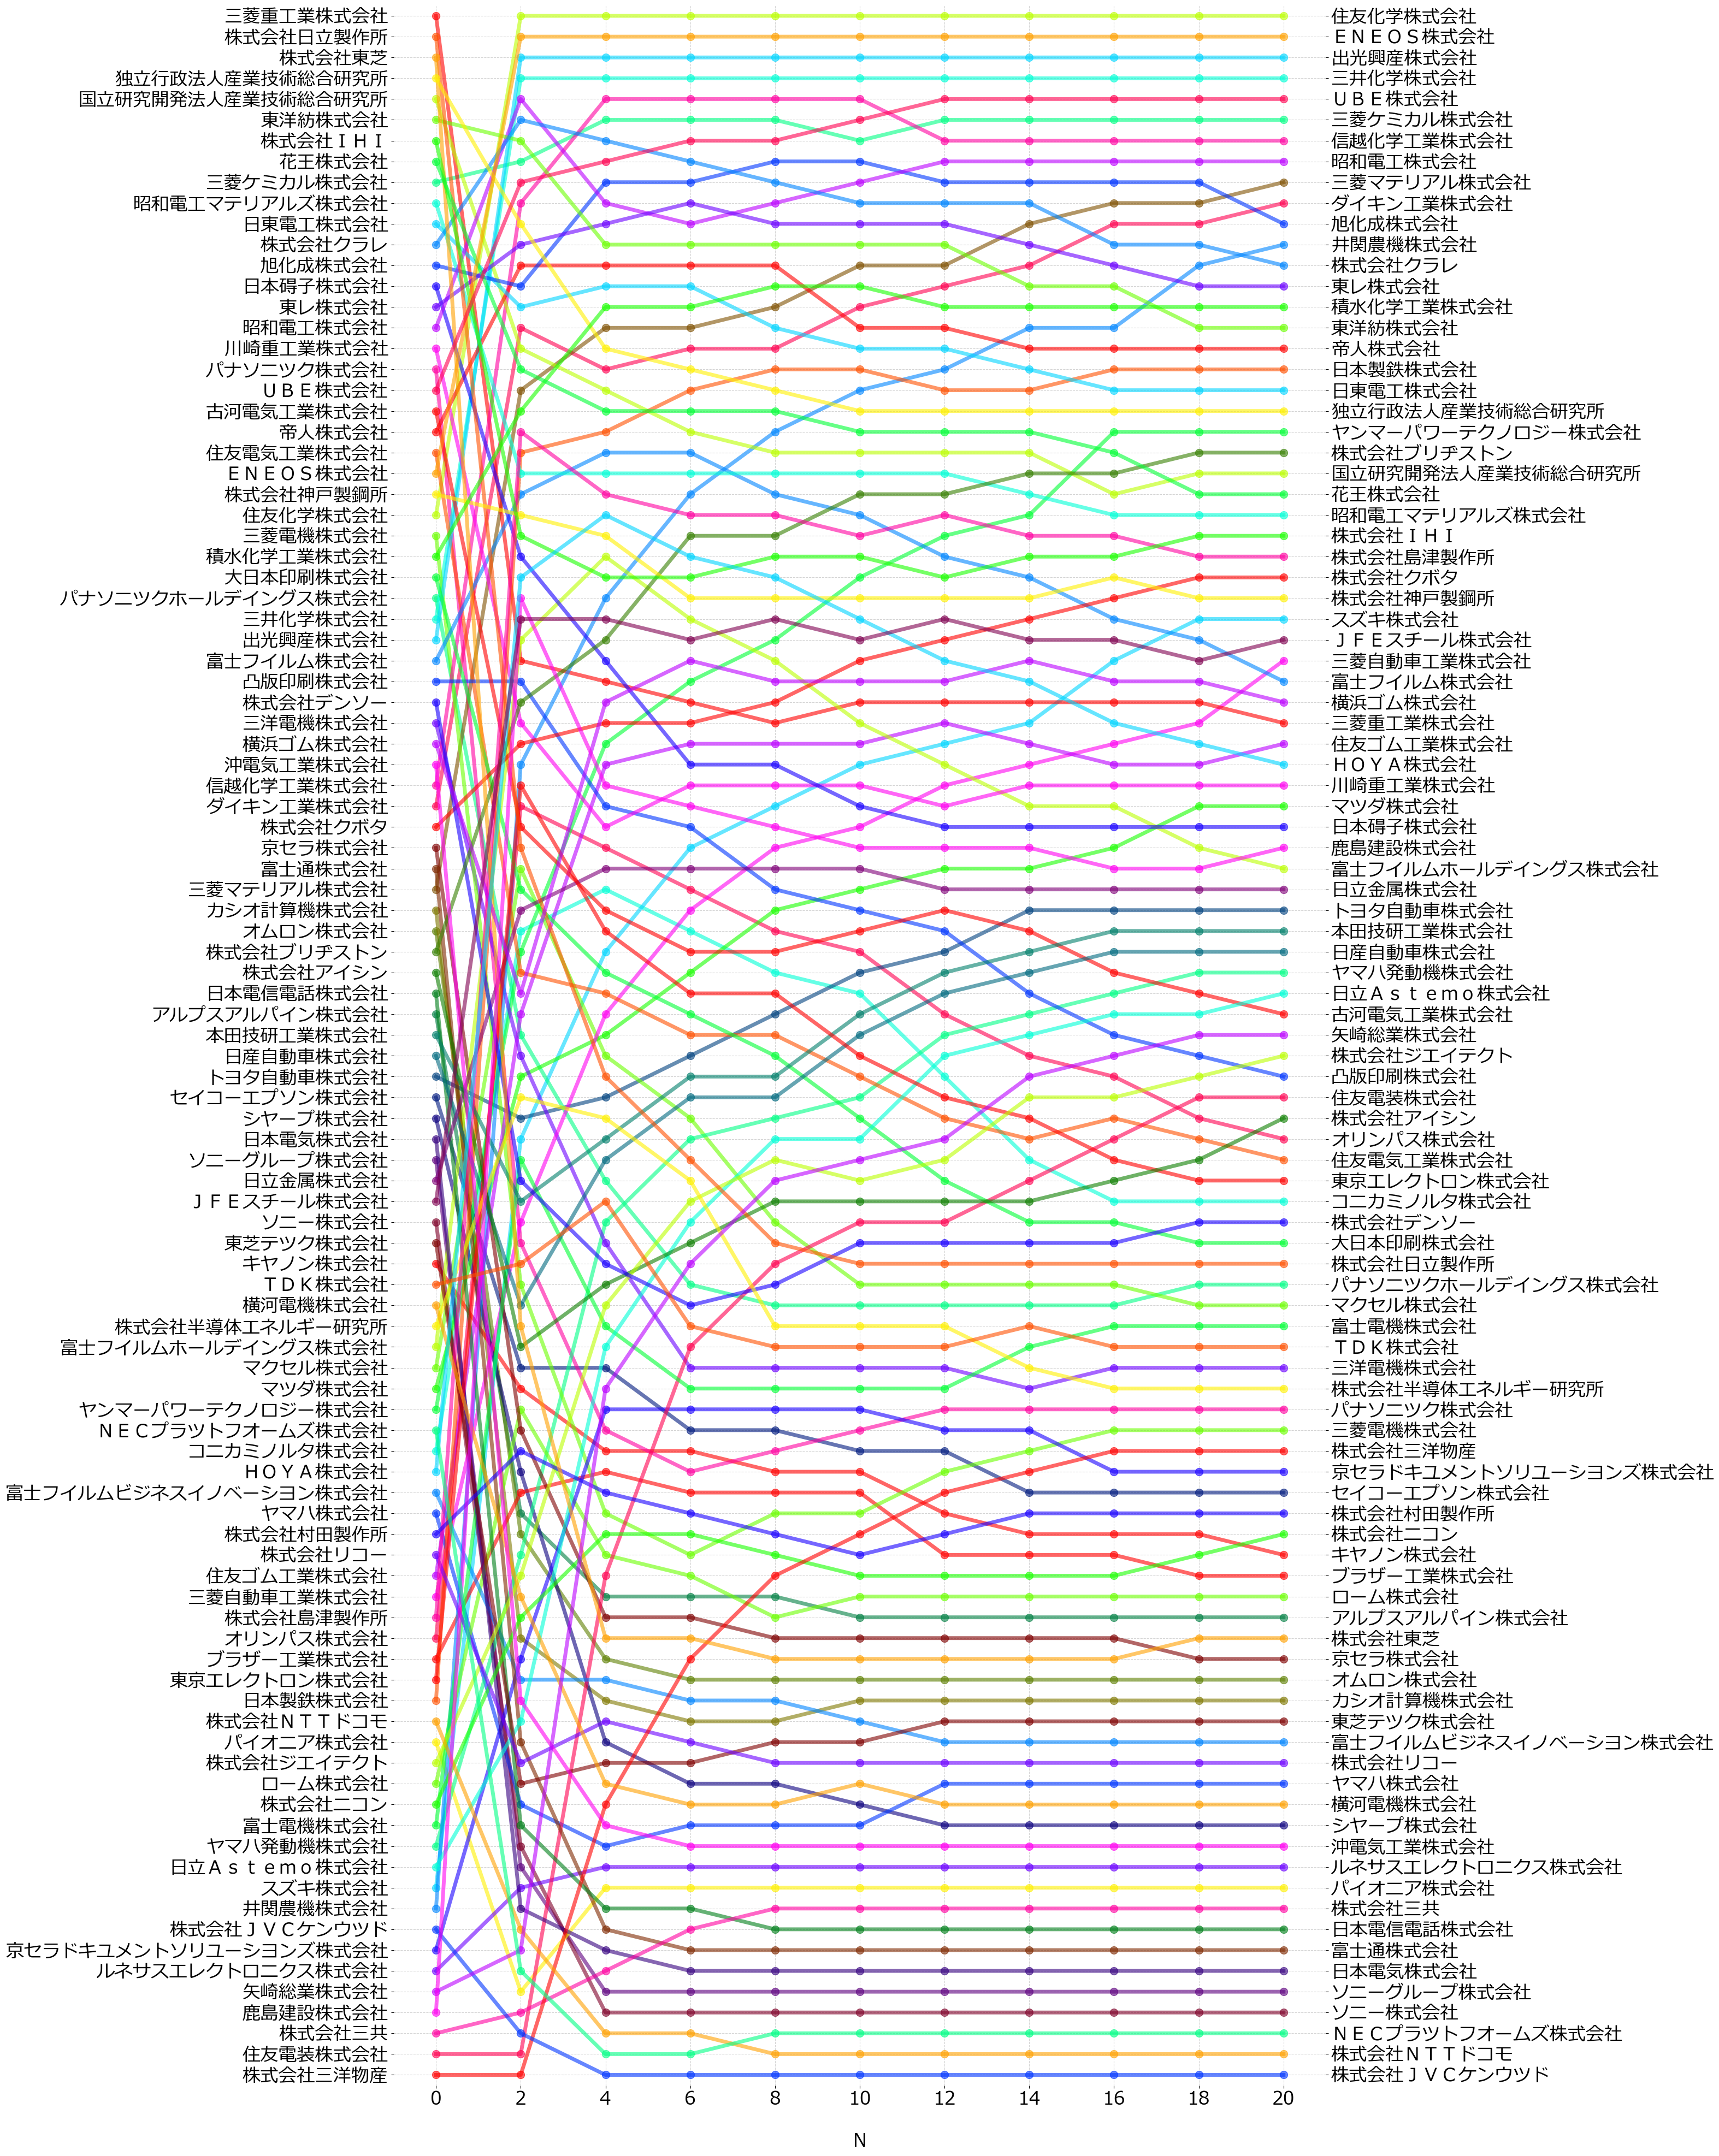

In [89]:
sample_df = df[(df[f'{ar}_{year_style}_period']==f'{year_start}-{year_end}')].sort_values('kci_rank', ascending=True).copy()
sample_df_dict = {'0': sample_df.melt(id_vars=['right_person_name'], value_vars=[f'diversity']).sort_values('value', ascending=False)}
fs = (32, 40)
for i in range(2, 20+1, 2):
    sample_df_dict[f'{i}'] = sample_df.melt(id_vars=['right_person_name'], value_vars=[f'kh_{i}']).sort_values('value', ascending=False)
    # if i >= 12: display(sample_df_dict[f'{i}'].head(10))
sample = vr.rank_doubleaxis(sample_df_dict, 
            version='kci', 
                rank_num=100,
                member_col='right_person_name', 
                num_col='value',
                prop_dict={
                    'figsize': fs,
                    'xlabel': 'N',
                    'ylabel': '',
                    'title': '',
                    'fontsize': 24, 
                    'year_range': 2, 
                    'ascending': False, 
                    # 'color': color_dict
                    'color': 'default'
                })

1981-1990 0.183
1991-2000 0.233
2001-2010 0.174


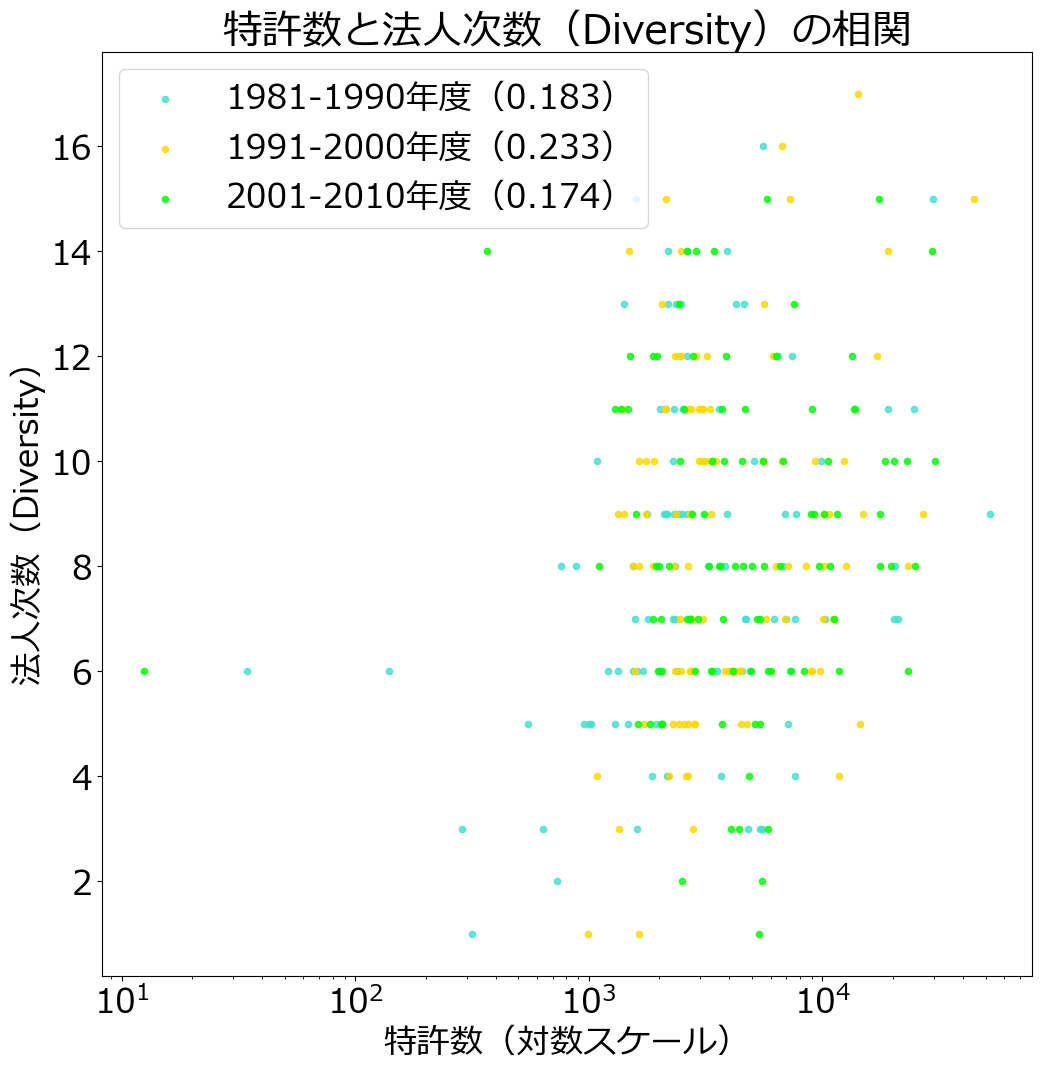

1981-1990 -0.237
1991-2000 -0.317
2001-2010 -0.297


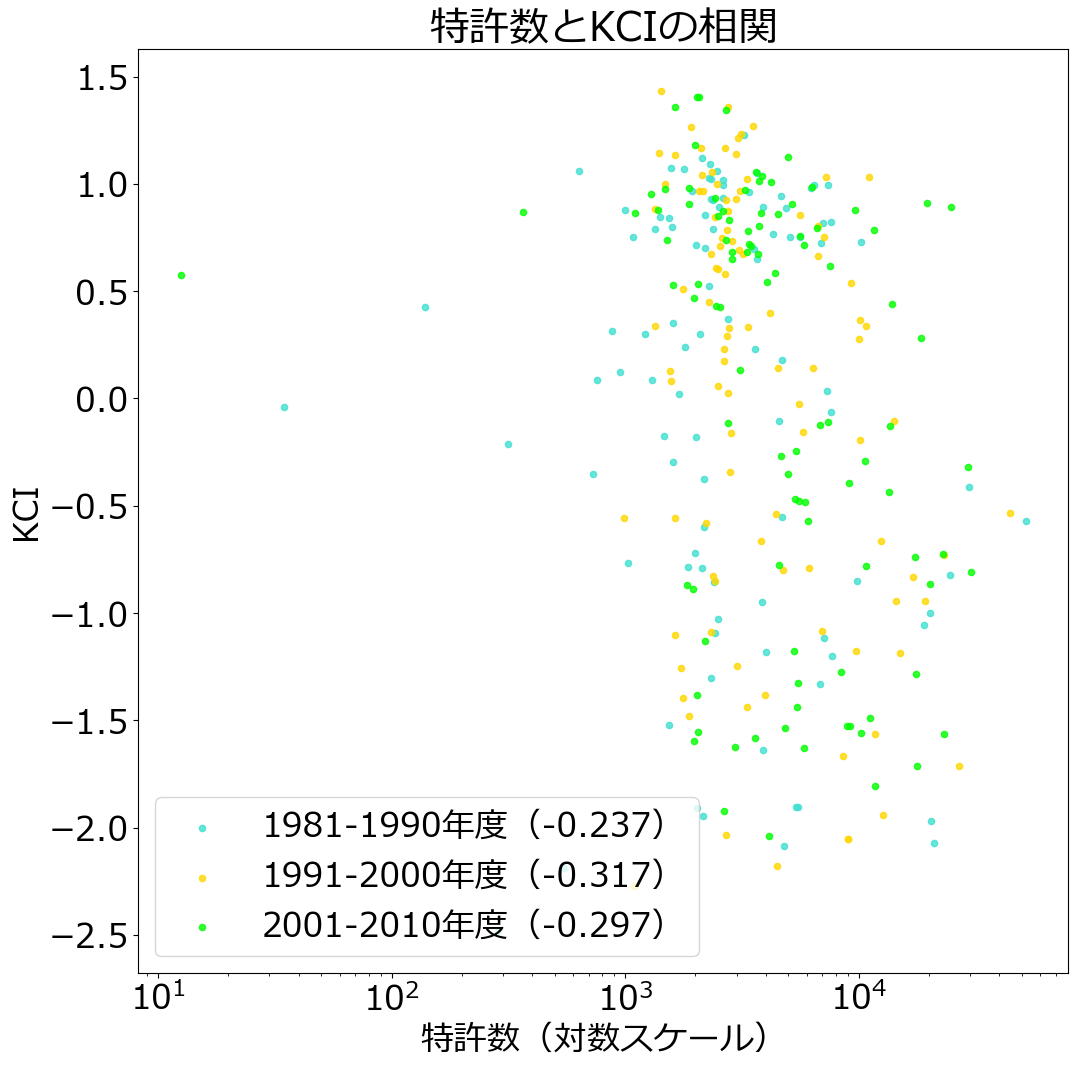

1981-1990 0.424
1991-2000 0.354
2001-2010 0.232


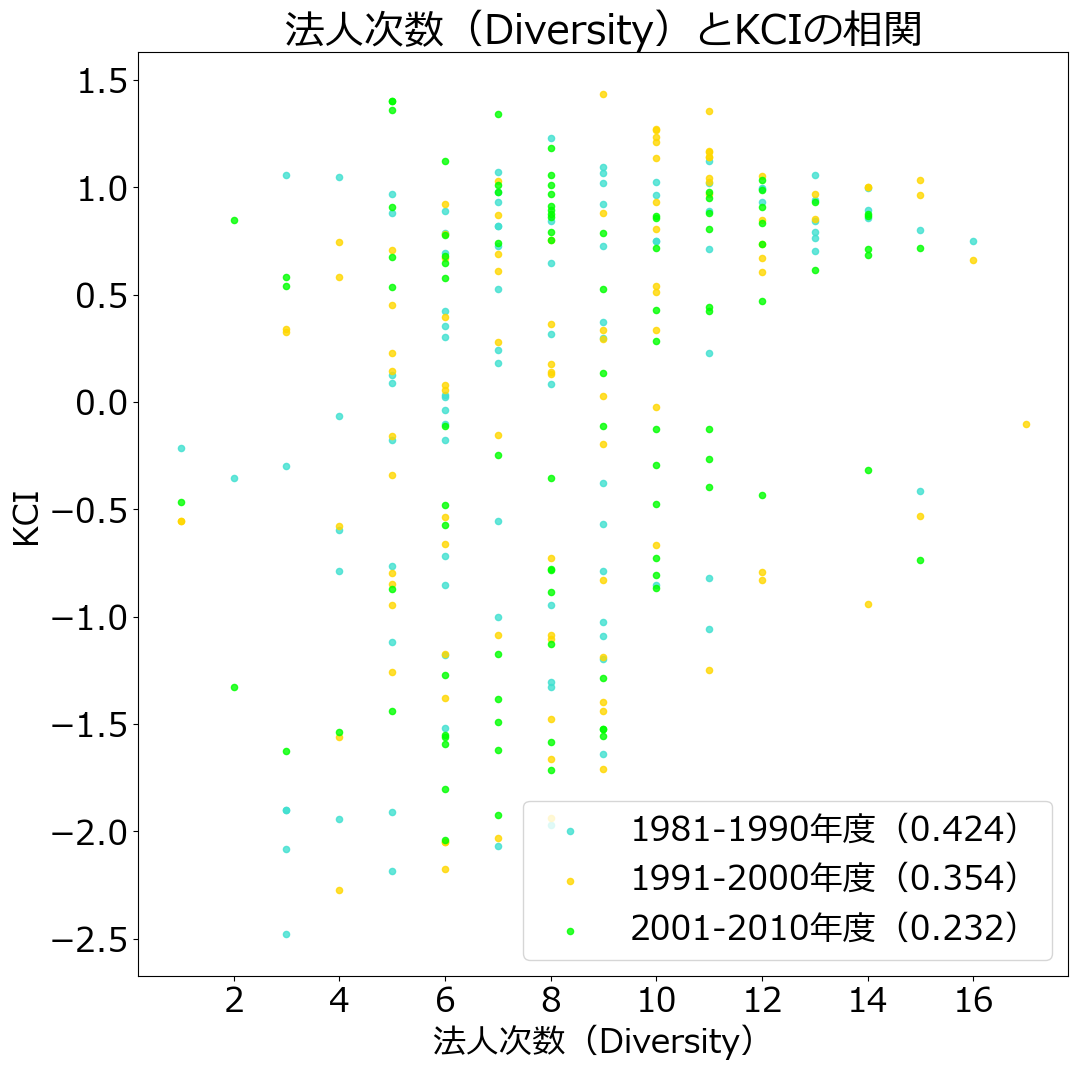

1981-1990 0.384
1991-2000 0.246
2001-2010 0.249


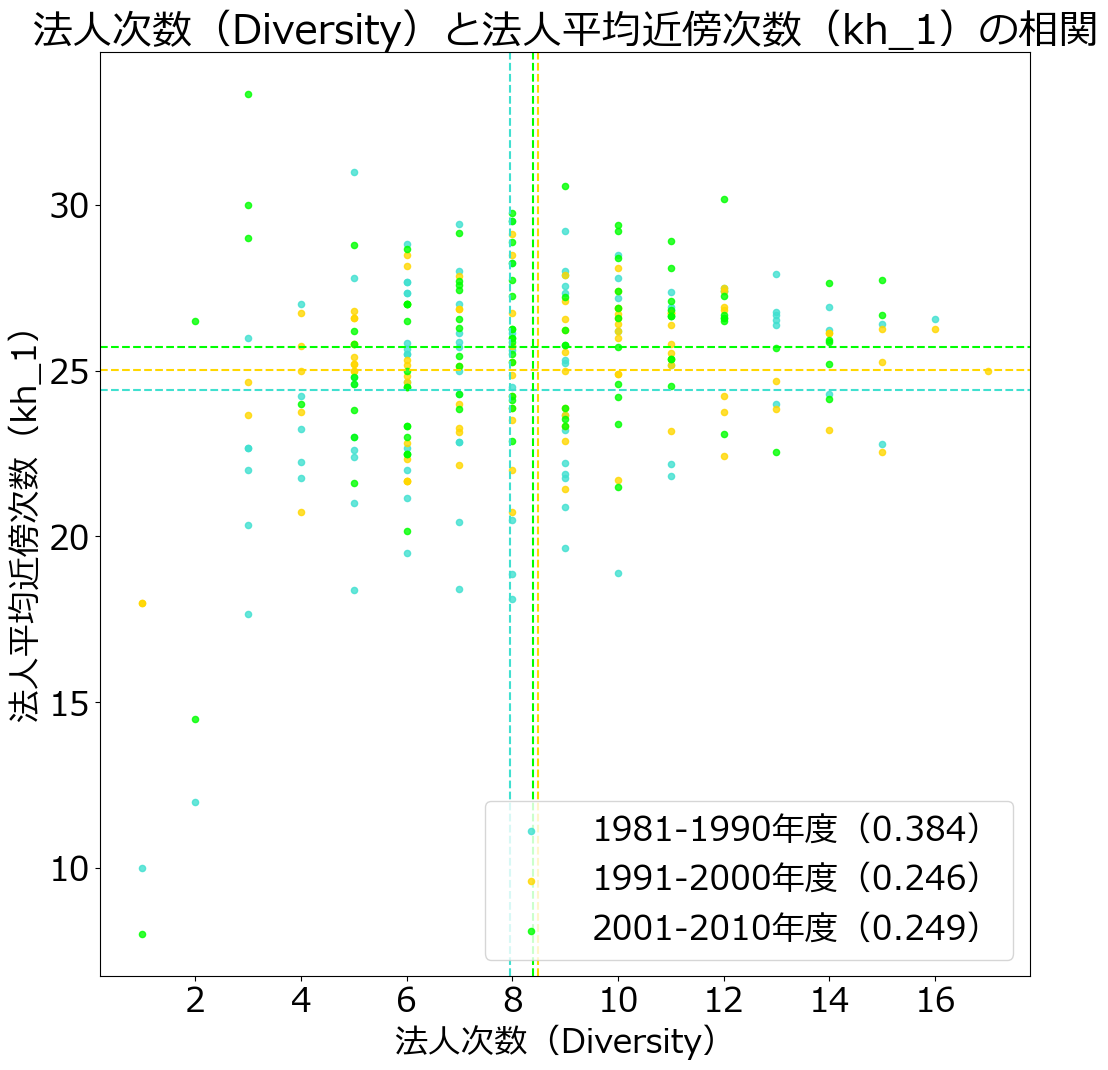

In [27]:
df_dict = {}
combi_dict = {# ind: [x, y, title, xlabel, ylabel, legend_loc]
              1: ['reg_num', 'diversity', '特許数と法人次数（Diversity）の相関', '特許数（対数スケール）', '法人次数（Diversity）', 'upper left'], 
              2: ['reg_num', 'kci', '特許数とKCIの相関', '特許数（対数スケール）', 'KCI', 'lower left'], 
              3: ['diversity', 'kci', '法人次数（Diversity）とKCIの相関', '法人次数（Diversity）', 'KCI', 'lower right'], 
              4: ['diversity', 'kh_1', '法人次数（Diversity）と法人平均近傍次数（kh_1）の相関', '法人次数（Diversity）', '法人平均近傍次数（kh_1）', 'lower right']
              }

for i, combi in combi_dict.items():
    fig, ax = plt.subplots(figsize=(12, 12))
    color_count = 0
    for period in range(year_start, year_end+1, year_range):
        period = f'{period}-{period+year_range-1}'
        corr_num = round(df[df[f'{ar}_{year_style}_period']==period][combi[0]].corr(df[df[f'{ar}_{year_style}_period']==period][combi[1]]), 3)
        print(period, corr_num)
        ax.scatter(df[df[f'{ar}_{year_style}_period']==period][combi[0]], 
                   df[df[f'{ar}_{year_style}_period']==period][combi[1]], s=20, 
                   alpha=0.8, label=f'{period}年度（{corr_num}）', color=color_list[color_count])
        if i == 4:
            ax.axvline(x=df[df[f'{ar}_{year_style}_period']==period][combi[0]].mean(), color=color_list[color_count], linestyle='--')
            ax.axhline(y=df[df[f'{ar}_{year_style}_period']==period][combi[1]].mean(), color=color_list[color_count], linestyle='--')
        ax.set_title(combi[2])
        if combi[0] in ['reg_num']: ax.set_xscale('log')
        if combi[1] in ['reg_num']: ax.set_yscale('log')
        ax.set_ylabel(combi[4])
        ax.set_xlabel(combi[3])
        ax.legend(loc=combi[5])
        color_count += 1
    plt.show()
    

c:\Users\rin\Desktop\KCIinJapaneseFirms\notebooks\3_analysis\../../src\analysis\rank.py:315: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


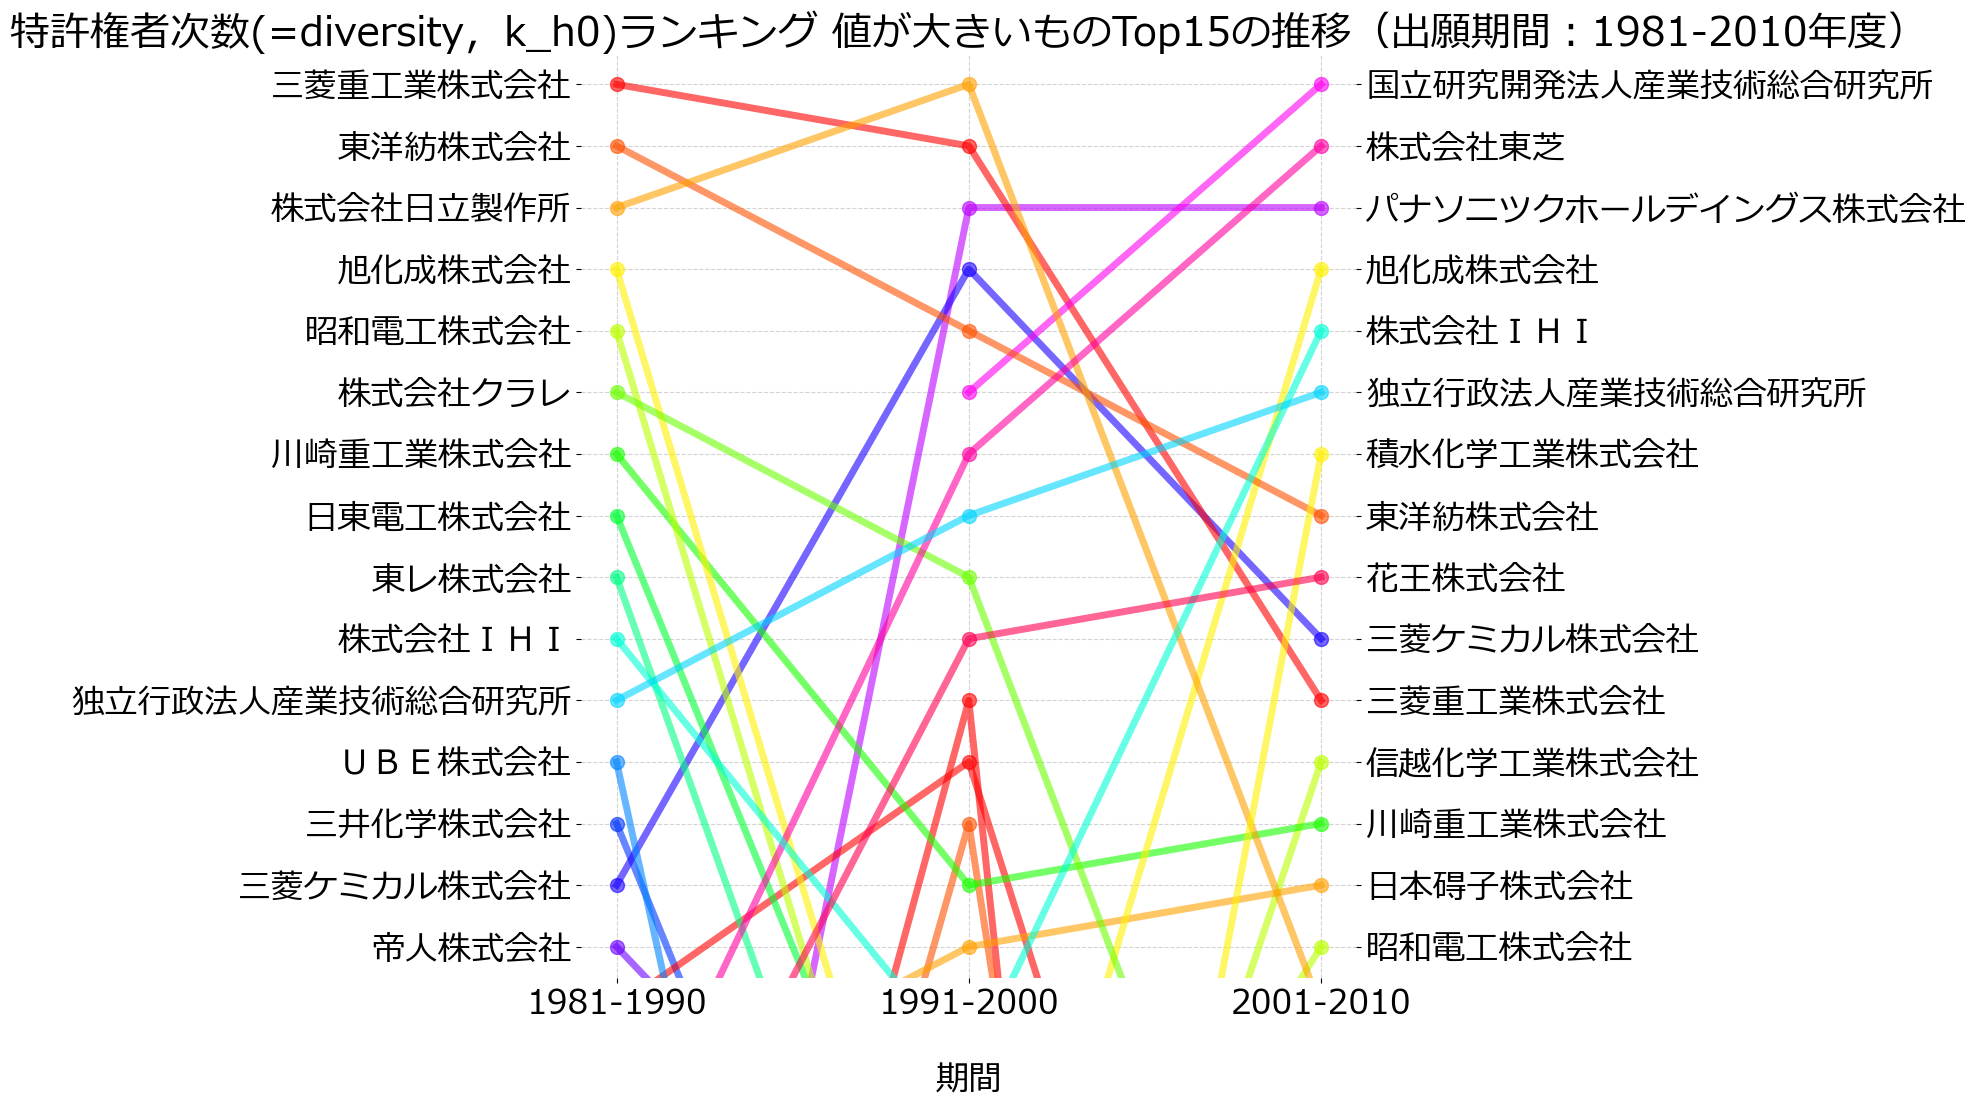

c:\Users\rin\Desktop\KCIinJapaneseFirms\notebooks\3_analysis\../../src\analysis\rank.py:315: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


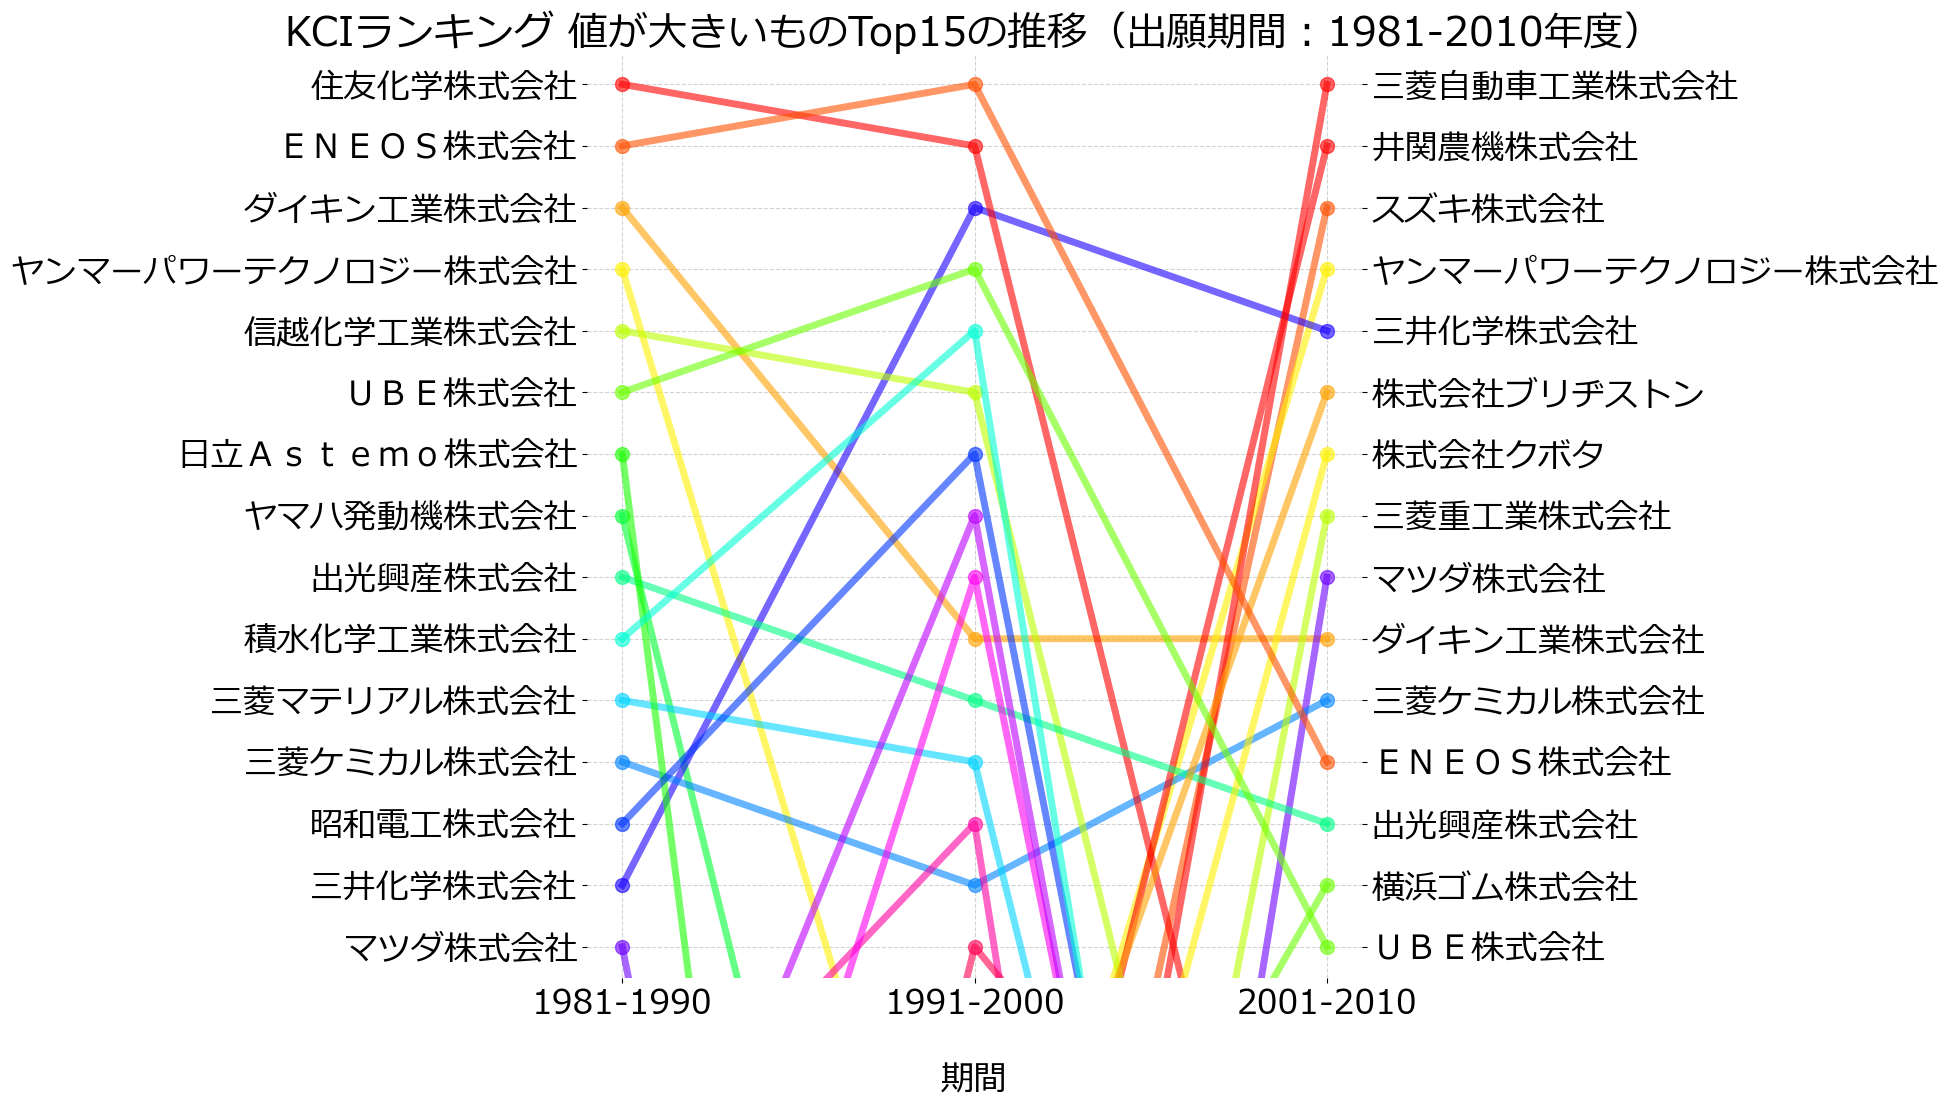

In [15]:
df_dict = {}
combi_dict = {# 1: ['right_person_name', 'diversity', f'特許権者次数(=diversity，k_h0)ランキング 値が小さいものTop15の推移（出願期間：{year_start}-{year_end}年度）', True], 
              # 1: ['right_person_name', '', f'特許権者次数(=diversity，k_h0)ランキング 値が小さいものTop15の推移（出願期間：{year_start}-{year_end}年度）', True], 
              2: ['right_person_name', 'diversity', f'特許権者次数(=diversity，k_h0)ランキング 値が大きいものTop15の推移（出願期間：{year_start}-{year_end}年度）', False], 
            #   3: ['right_person_name', 'eci', f'KCIランキング 値が小さいものTop15の推移（出願期間：{year_start}-{year_end}年度）', True], 
              # 3: ['right_person_name', 'ipc_class_num', f'IPC数ランキング 値が大きいものTop15の推移（出願期間：{year_start}-{year_end}年度）', False], 
              4: ['right_person_name', 'kci', f'KCIランキング 値が大きいものTop15の推移（出願期間：{year_start}-{year_end}年度）', False], 
              # 5: ['ipc_class', 'ubiquity', f'IPC次数(=ubiquity, k_i0)ランキング 低次数Top15の推移（出願期間：{year_start}-{year_end}年度）', True], 
              # 6: ['ipc_class', 'ubiquity', f'IPC次数(=ubiquity, k_i0)ランキング 高次数Top15の推移（出願期間：{year_start}-{year_end}年度）', False], 
            #   7: ['ipc_class', 'pci', f'TCI(Technological Compexity Index)ランキング 値が低いものTop15の推移（出願期間：{year_start}-{year_end}年度）', True], 
              # 8: [classification, 'tci', f'TCI(Technological Compexity Index)ランキング 値が高いものTop15の推移（出願期間：{year_start}-{year_end}年度）', False]
              }



for i, combi in combi_dict.items():
    div_df = df[[f'{ar}_{year_style}_period']+combi[:1+1]].sort_values(by=[f'{ar}_{year_style}_period', combi[1]], ascending=[True, False]).copy()
    div_df = div_df.drop_duplicates(keep='first')
    div_df_dict = {}
    for year in range(year_start, year_end+1, year_range):
        period = f'{year}-{year+year_range-1}'
        div_df_dict[period] = div_df[div_df[f'{ar}_{year_style}_period']==period].copy()
        # display(div_df_dict[f'{year}-{year+year_range-1}'].head(15))
    if i==4:
        df['kci_rank'] = df.groupby(f'{ar}_{year_style}_period')[['kci']].rank(ascending=False, method='first').reset_index(drop=False)['kci']
        # display(c_df[c_df['right_person_name'].str.contains('三菱重工業')])
    if i > 4: fs = (12, 15)
    else: fs = (10, 12)
    # display(div_df)
    sample = vr.rank_doubleaxis(div_df_dict, 
                version='kci', 
                    rank_num=15,
                    member_col=combi[0], 
                    num_col=combi[1],
                    prop_dict={
                        'figsize': fs,
                        'xlabel': '期間',
                        'ylabel': '',
                        'title': combi[2],
                        'fontsize': 24, 
                        'year_range': year_range, 
                        'ascending': combi[3], 
                        # 'color': color_dict
                        'color': 'default'
                    })
    plt.savefig(f'{output_dir}figures/{combi[1]}_{ar}_{year_style}_{top_p_or_num[0]}_{top_p_or_num[1]}.png')
    plt.show()


In [16]:
output_dir

'../../output/'

In [17]:
filtered_df = pd.read_csv('../../data/interim/internal/filtered_before_agg/addedclassification.csv', sep=',')
filtered_df

reg_num          ipc right_person_name  app_year  app_nendo  \
0        5684492  G10H   3/18           ＤＲＣ合同会社      2010       2010   
1        5684512  B62D  57/02    株式会社ＩＨＩエアロスペース      2010       2010   
2        5684598  A47C   7/62          株式会社オカムラ      2011       2010   
3        5684620  H01M   4/62          三井化学株式会社      2011       2010   
4        5684633  G06F  12/02        日本電信電話株式会社      2011       2011   
...          ...          ...               ...       ...        ...   
5790567  1846641  G09B  23/40          国立科学博物館長      1988       1987   
5790568  1846642  G09B  23/40          国立科学博物館長      1988       1987   
5790569  1846643  G09B  23/40          国立科学博物館長      1988       1987   
5790570  1846644  G09B  23/40          国立科学博物館長      1988       1987   
5790571  3201763  C23C  18/32         学校法人早稲田大学      1990       1990   

         reg_year  reg_nendo  schmoch35  
0            2015       2014         34  
1            2015       2014         32  
2            2015       2014         33  
3            2015       2014          1  
4            2015       2014          6  
...           ...        ...        ...  
5790567      1994       1994         12  
5790568      1994       1994         12  
5790569      1994       1994         12  
5790570      1994       1994         12  
5790571      2001       2001         21  

[5790572 rows x 8 columns]

In [18]:
top_p_or_num

('num', 100)

In [19]:
# filtered_df['right_person_name'].nunique()
filtered_df[filtered_df[f'{ar}_{year_style}'].isin(range(year_start, year_end+1))]['right_person_name'].nunique()

64330

In [20]:
filtered_df[filtered_df[f'{ar}_{year_style}'].isin(range(year_start, year_end+1))&(filtered_df['right_person_name'].isin(df['right_person_name']))]['right_person_name'].nunique()

100

In [21]:
1734723 / 3602904

0.4814791068538046

In [22]:
10000 / 64330

0.155448468832582